# Анализ данных развлекательного приложения Procrastinate Pro+

План работы:
1. [Изучить общую информацию о датафреймах](#first): пропуски, типы данных, некорректные названия столбцов.
2. Найти и обработать пропуски в данных, если необходимо.
3. Поменять типы данных, где необходимо.
4. Проверить наличие явных и неявных дубликатов, обработать значения.

6. Исследовать значения параметров: [пользовательские профили](#second), [регионы](#third), [устройства](#fourth), [источники привлечения.](#fifth)
7. [Определить период, за который предоставлены данные.](#second)
8. Определить долю платящих пользователей по каждому из параметров.

9. [Выявить общую сумму маркетинговых расходов за данный период.](#sixth)
10. [Определить количество затрат по каждому рекламному источнику.](#seventh)
11. [Исследовать динамику расходов по каждому рекламному источнику.](#eighth)
12. [Установить среднюю цену привлечения пользователя по каждому источнику.](#ninth)

13. [Проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.](#tenth)
14. [Проанализировать конверсию пользователей и динамику её изменения, удержание пользователей и динамику.](#eleventh)
15. [Проанализировать окупаемость рекламы с разбивкой: по устройствам, по странам, по рекламным каналам.](#twelfth)
14. [Выявить общую окупаемость рекламы, направленной на привлечение пользователей.](#thirteenth)
15. Определить устройства, страны и рекламные каналы негативное влияющие на окупаемость.
16. Установить причины проблем с окупаемостью.

15. Перепроверить работспособность кода и сформулировать [общий вывод](#fourteenth) и [рекомендации для отдела маркетинга на основе исследованных данных.](#fifteenth)   

### Подготовка данных

<a id='first'></a>

In [1]:
#импорт библиотек 

import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
visits, orders, costs = (pd.read_csv('/datasets/visits_info_short.csv'),
                        pd.read_csv('/datasets/orders_info_short.csv'),
                        pd.read_csv('/datasets/costs_info_short.csv'))

In [3]:
def first_processing(df):
    info = df.info(),
    head = df.head(),
    duplicates=df.duplicated().sum()
    return info, print('Дубликатов -',duplicates), head

#### Предобработка visits

In [4]:
first_processing(visits)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB
Дубликатов - 0


((None,),
 None,
 (        User Id         Region   Device  Channel        Session Start  \
  0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
  1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
  2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
  3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
  4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   
  
             Session End  
  0  2019-05-01 02:45:01  
  1  2019-05-01 04:47:35  
  2  2019-05-01 15:32:08  
  3  2019-05-01 00:54:25  
  4  2019-05-01 03:57:40  ,))

In [5]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns]
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [6]:
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [7]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [8]:
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

**Выводы по visits:**\
Всего в датафрейме 309 901 записей.\
Пропуски, дубликаты отсутствуют.\
Данные в столбцах session_start и session_end приведены к типу datetime.\
Для удобства написания дальнейшего кода, названия столбцов приведены к snake_case.

#### Предобработка orders

In [9]:
first_processing(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
Дубликатов - 0


((None,),
 None,
 (        User Id             Event Dt  Revenue
  0  188246423999  2019-05-01 23:09:52     4.99
  1  174361394180  2019-05-01 12:24:04     4.99
  2  529610067795  2019-05-01 11:34:04     4.99
  3  319939546352  2019-05-01 15:34:40     4.99
  4  366000285810  2019-05-01 13:59:51     4.99,))

In [10]:
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns]
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


**Выводы по orders:**\
Всего в датафрейме 40 212 записей.\
Пропуски, дубликаты отсутствуют.\
Данные в столбце event_dt приведены к типу datetime.\
Для удобства написания дальнейшего кода, названия столбцов приведены к snake_case.

#### Предобработка costs

In [11]:
first_processing(costs)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
Дубликатов - 0


((None,),
 None,
 (           dt   Channel  costs
  0  2019-05-01  FaceBoom  113.3
  1  2019-05-02  FaceBoom   78.1
  2  2019-05-03  FaceBoom   85.8
  3  2019-05-04  FaceBoom  136.4
  4  2019-05-05  FaceBoom  122.1,))

In [12]:
costs.columns = map(str.lower, costs.columns)
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [13]:
costs['channel'].value_counts()

YRabbit               180
FaceBoom              180
TipTop                180
OppleCreativeMedia    180
lambdaMediaAds        180
MediaTornado          180
AdNonSense            180
RocketSuperAds        180
LeapBob               180
WahooNetBanner        180
Name: channel, dtype: int64

**Выводы по costs:**\
Всего в датафрейме 1800 записей.\
Пропуски, дубликаты отсутствуют.\
Данные в столбце dt приведены к типу date.

### Функции для расчёта и анализа LTV, ROI, удержания и конверсии.

#### Функция - профили

In [14]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].values.astype('datetime64[M]')
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Функции - Retention Rate

In [15]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    dimensions = ['payer'] + dimensions

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days
    
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time

In [16]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    plt.figure(figsize=(15, 10))

    retention = retention.drop(columns=['cohort_size', 0])
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    ax3 = plt.subplot(2, 2, 3)
 
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
 
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)

    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### Функции - Conversion Rate

In [17]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)

        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    if 'cohort' in dimensions: 
        dimensions = []

    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return result_raw, result_grouped, result_in_time

In [18]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    plt.figure(figsize=(15, 5))

    conversion = conversion.drop(columns=['cohort_size'])
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функции - LTV и ROI

In [19]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        roi = result.div(cac['cac'], axis=0)

        roi = roi[~roi['cohort_size'].isin([np.inf])]

        roi['cohort_size'] = cohort_sizes

        roi['cac'] = cac['cac']

        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    if 'cohort' in dimensions:
        dimensions = []

    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [20]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    plt.figure(figsize=(20, 10))

    ltv = ltv.drop(columns=['cohort_size'])
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    cac_history = roi_history[['cac']]

    roi = roi.drop(columns=['cohort_size', 'cac'])
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

#### Функция - сглаживание данных

In [21]:
# функция для сглаживания фрейма

def filter_data(df, window):
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Исследовательский анализ данных

#### Анализ пользовательских профилей

<a id='second'></a>

In [22]:
profiles=get_profiles(visits, orders, costs)
profiles

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


In [23]:
profiles['dt'].min()

datetime.date(2019, 5, 1)

In [24]:
profiles['dt'].max()

datetime.date(2019, 10, 27)

**Вывод 3.1:**\
Всего в датафрейме profiles представлены данные с 1 мая 2019 года по 27 октября 2019 года.\
\
Для каждого пользователя: уникальный user_id, дата и время первой сессии, канал привлечения, устройство, страна, наличие оплаченных заказов(статус платящего/неплатящего пользователя), цена привлечения.

#### Анализ пользователей по регионам

<a id='third'></a>

In [25]:
def user_analysis(df,a):
    stat = pd.pivot_table(df,
              index=a,
              values=['payer','user_id'],
              aggfunc={'payer':'sum',
                      'user_id':'count'})
    stat=stat.rename(columns={'payer':'total_payer','user_id':'total_user_id'})
    stat['payer_share']=(stat['total_payer']/stat['total_user_id'])
    return stat.sort_values(by='payer_share', ascending=False)

In [26]:
user_analysis(profiles, ['region'])

,total_payer,total_user_id,payer_share
region,,,
United States,6902,100002,0.069019
Germany,616,14981,0.041119
UK,700,17575,0.039829
France,663,17450,0.037994


In [27]:
profiles['user_id'].count()

150008

**Выводы по 3.2:**\
В таблице представлены данные о пользователях из 4-х стран: США, Германия, Великобритания и Франция.\
\
Наиболее высокая доля платящих пользователей среди профилей из США - около 7%. Стоит также отметить, что общее количество пользователей-американцев составляет 2/3 (66%) от общего количества пользователей.\
\
Оставшиеся 33% практически поровну делят европейские страны с небольшим отставанием Германии. Тем не менее, количество платящих пользователей в этих 3-х странах примерно равно и составляет около 4% (с небольшим, менее чем в пол-процента, отставанием Франции).
 

#### Анализ пользователей по устройствам

<a id='fourth'></a>

In [28]:
user_analysis(profiles, ['device'])

,total_payer,total_user_id,payer_share
device,,,
Mac,1912,30042,0.063644
iPhone,3382,54479,0.062079
Android,2050,35032,0.058518
PC,1537,30455,0.050468


**Выводы по 3.3:**\
В таблице представлены данные о количестве пользователей в разбивке по 4-м устройствам: Android, Mac, PC и IPhone.\
\
Доля платящих пользователей Android, Mac, Iphone составляет около 6%. Пользователи PC отстают совсем немного - 5% платящих пользователей.\
\
Стоит подчеркнуть, что 36% от всех пользователей - владельцы Iphone. Оставшиеся 64% практически равномерно распределены между другими устройствами с небольшим преимуществом у Android.

#### Анализ пользователей по рекламным источникам

<a id='fifth'></a>

In [29]:
user_analysis(profiles, ['channel'])

,total_payer,total_user_id,payer_share
channel,,,
FaceBoom,3557,29144,0.122049
AdNonSense,440,3880,0.113402
lambdaMediaAds,225,2149,0.104700
TipTop,1878,19561,0.096007
RocketSuperAds,352,4448,0.079137
WahooNetBanner,453,8553,0.052964
YRabbit,165,4312,0.038265
MediaTornado,156,4364,0.035747
LeapBob,262,8553,0.030633


**Выводы по 3.4:**\
В таблице представлены данные о количестве пользователей в разбивке по 11-ти источникам привлечения.\
\
Доля платящих пользователей наиболее высокая среди пользователей привлечённых через FaceBoom(12%),AdNonSense(11%),lambdaMediaAds(10%) и TipTop(10%). Наименьшая доля платящих пользователей у источников LeapBob(3%), OppleCreativeMedia(3%) и у органических пользователей(2%).\
\
Наибольшее общее количество пользователей - органические, среди рекламных выделяются FaceBoom и TipTop. Наименьшее количество пользователей у AdNonSense и lambdaMediaAds.

#### Общий вывод 3:

Данные полученные для анализа охватывают период **с 1 мая по 27 октября 2019 года**.\
\
В профиле каждого пользователя содержатся *уникальный user_id, дата и время первой сессии, канал привлечения, устройство, страна, наличие оплаченных заказов(статус платящего/неплатящего пользователя), цена привлечения(CAC)*.\
Доступны данные о пользователях сервиса из 4-х стран: *США, Германия, Великобритания и Франция*.\
Устройства пользователей разделены на 4 категории: *Android, Mac, PC и IPhone*.\
Всего дано 11 источников привлечения пользователей - *10 рекламных каналов и 1 пункт для органических пользователей*.\
\
Общее количество профилей пользователей - **150 007**.\
*По странам*: 2/3 от общего количества пользователей  жители США. Наиболее высокая доля платящих пользователей также среди профилей из США - около 7%.\
Количество профилей в остальных странах примерно равно, немного отстает Германия. Платящие пользователи в каждой европейской стране составляют примерно 4%.\
\
*По устройствам*: 1/3 пользователей - владельцы айфонов. Среди владельцев Android, Mac, Iphone около 6% платящих пользователей. Пользователи PC немного ниже - 5% платящих пользователей.\
\
*По рекламным источникам*:Наибольшую долю платящих пользователей приносят FaceBoom(12%),AdNonSense(11%),lambdaMediaAds(10%) и TipTop(10%). 1/3 от всех пользователей пришли напрямую, 1/3 призодится на суммарные FaceBoom(около 30 тыс.) и TipTop(около 20 тыс.). На оставшиеся источники-лидеры AdNonSense,lambdaMediaAds приходится менее 1% пользователей.\
Источники LeapBob(3%), OppleCreativeMedia(3%) показали наименьшую конвертацию в платящих пользователей.

### Маркетинг

#### Общие расходы на маркетинг

<a id='sixth'></a>

In [30]:
costs['costs'].sum()

105497.30000000002

**Выводы 4.1:**\
    Общие расходы на маркетинг составили 105 497,3 денежных единиц.

#### Распределение трат по рекламным источникам

<a id='seventh'></a>

In [31]:
pd.pivot_table(costs,
              index=['channel'],
              values=['costs'],
              aggfunc='sum').sort_values(by='costs', ascending=False)

,costs
channel,
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60
MediaTornado,954.48


**Выводы 4.2:**\
Наиболее дорогими каналами привлечения являются TipTop(около 50% от общего количества трат) и FaceBoom (около 30%).\
Самыми дешевыми рекламными источниками являются MediaTornado и YRabbit - менее 1% от общих трат.

#### Динамика расходов по каждому источнику

<a id='eighth'></a>

In [32]:
costs['dt'] = pd.to_datetime(costs['dt'])
costs['week']=costs['dt'].dt.isocalendar().week
costs.head()

,dt,channel,costs,week
0,2019-05-01,FaceBoom,113.3,18
1,2019-05-02,FaceBoom,78.1,18
2,2019-05-03,FaceBoom,85.8,18
3,2019-05-04,FaceBoom,136.4,18
4,2019-05-05,FaceBoom,122.1,18


Text(0.5, 1.0, 'Затраты на маркетинг по неделям')

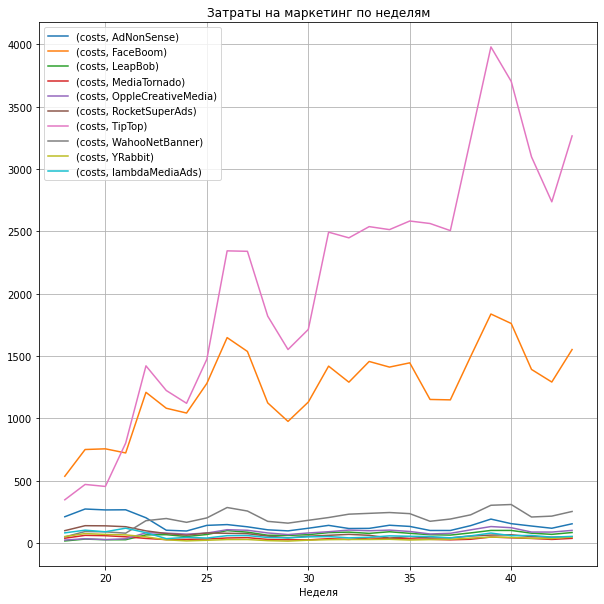

In [33]:
weekly_costs=pd.pivot_table(costs,
              index=['week'],
              columns=['channel'],
              values=['costs'],
              aggfunc='sum')

weekly_costs.plot(grid=True, figsize=(10,10))
plt.legend()
plt.xlabel('Неделя')
plt.title('Затраты на маркетинг по неделям')

In [34]:
costs['month']=costs['dt'].dt.month
costs.head()

,dt,channel,costs,week,month
0,2019-05-01,FaceBoom,113.3,18,5
1,2019-05-02,FaceBoom,78.1,18,5
2,2019-05-03,FaceBoom,85.8,18,5
3,2019-05-04,FaceBoom,136.4,18,5
4,2019-05-05,FaceBoom,122.1,18,5


Text(0.5, 1.0, 'Затраты на маркетинг в месяц')

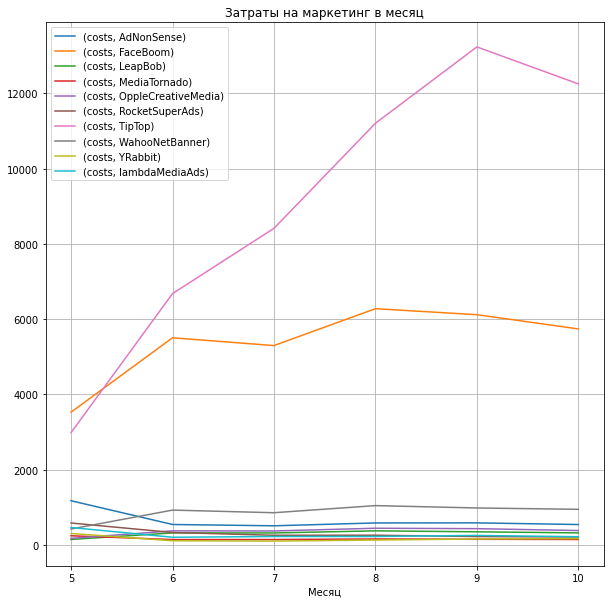

In [35]:
monthly_costs=pd.pivot_table(costs,
              index=['month'],
              columns=['channel'],
              values=['costs'],
              aggfunc='sum')

monthly_costs.plot(grid=True, figsize=(10,10))
plt.legend()
plt.xlabel('Месяц')
plt.title('Затраты на маркетинг в месяц')

**Выводы 4.3:**\
Анализируя динамику изменения расходов по каждому источнику, можно сразу выделить лидеров - TipTop и FaceBoom. Изначально цена этих наиболее дорогих рекламных каналов была выше других и продолжала расти.\
\
Канал TipTop, хотя изначально был ближе по цене к всем остальным источникам, начиная с 20 недели стал стремительно расти. До 25 недели динамика роста TipTop и FaceBoom очень схожа, однако после  25 недели TipTop уходит вперед и траты начинают превышать траты на FaceBoom - почти в 2 раза, траты на остальные источники - почти в 10 раз.\
График динамики трат на FaceBoom хотя также сильно отличается от прочих источников, и рост его не так стремителен, однако, тем не менее траты на FaceBoom также высоки. Хотя на графике "затрат на маркетинг по месяцам", начиная с августа, заметен спад, на понедельном графике все не так однозначно.\
\
Траты на остальные рекламные каналы схожи, сливаются практически в одну линию внизу графика.

#### CAC из каждого источника

<a id='ninth'></a>

In [36]:
pd.pivot_table(profiles,
               index='channel',
               values='acquisition_cost',
               aggfunc='mean').sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


In [37]:
pd.pivot_table(profiles,
               index='channel',
               values='acquisition_cost',
               aggfunc='median').sort_values(by='acquisition_cost', ascending=False)

,acquisition_cost
channel,
TipTop,3.000000
FaceBoom,1.114667
AdNonSense,1.004348
lambdaMediaAds,0.733333
WahooNetBanner,0.600000
RocketSuperAds,0.404444
OppleCreativeMedia,0.250000
MediaTornado,0.220926
YRabbit,0.214286


**Выводы 4.4:**\
Наибольшая стоимость привлечения клиента составляет около 3 денежных единиц, лидер - TipTop.\
Также относительно высокая цена привлечения - около 1 денежной единицы - у источников FaceBoom и AdNonSense.\
\
Дешевыми, с точки зрения CAC, являются источники - OppleCreativeMedia, MediaTornado, YRabbit,LeapBob с ценой привлечения около 0,2 денежной единицы.

#### Общий вывод 4:

Общие расходы на маркетинг - **105 497,3 денежных единиц**.\
\
Около половины от общего количества расходов приходится на рекламный канал TipTop, ещё 30% на FaceBoom. На оставшиеся 8 каналов (исключая, конечно, органических пользователей) приходится всего 20% рекламного бюджета.\
Дешевле всех обходятся рекламные источники MediaTornado и YRabbit - менее 1% от общих трат.\
\
В ходе анализа динамики изменения расходов, сразу привлекают внимание показатели самых дорогих рекламных каналов TipTop и FaceBoom. Эти источники изначально обходились компании дороже остальных и продолжили расти.\
С 20 по 25 неделю(июль) TipTop и FaceBoom стремительно растут вместе, после 25 недели TipTop продолжает еще более стремительно расти. Рекламные траты на пике превышают траты на FaceBoom более, чем в 2 раза, на остальные источники - почти в 10 раз.\
Траты на FaceBoom, хотя и уступают TipTop-у, относительно остальных источников также достаточно высоки.\
\
TipTop также лидирует по стоимости привлечения клиента - 3 денежные единицы.
FaceBoom и AdNonSense также относительно дорогие с точки зрения цены привлечения - около 1 денежной единицы.\
Наиболее дешевыми - около 0,2 денежной единицы - источники - OppleCreativeMedia, MediaTornado, YRabbit,LeapBob.

### Оценка окупаемости рекламы

In [38]:
#Входные данные:
#Момент анализа данных - 1 ноября 2019 года,
#горизонт анализа данных - 14 дней.

In [39]:
profiles_filtered=profiles.query('channel != "organic"')
profiles_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93569 entries, 0 to 150006
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   user_id           93569 non-null  int64         
 1   first_ts          93569 non-null  datetime64[ns]
 2   channel           93569 non-null  object        
 3   device            93569 non-null  object        
 4   region            93569 non-null  object        
 5   dt                93569 non-null  object        
 6   month             93569 non-null  datetime64[ns]
 7   payer             93569 non-null  bool          
 8   acquisition_cost  93569 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 6.5+ MB


#### Анализ LTV, ROI

<a id='tenth'></a>

In [40]:
observation_date= datetime(2019, 11, 1).date()
horizon= 14

ltv_raw,ltv,ltv_time,roi,roi_time = get_ltv(
    profiles_filtered,
    orders,
    observation_date,
    horizon,
    dimensions=[],
    ignore_horizon=False,
)

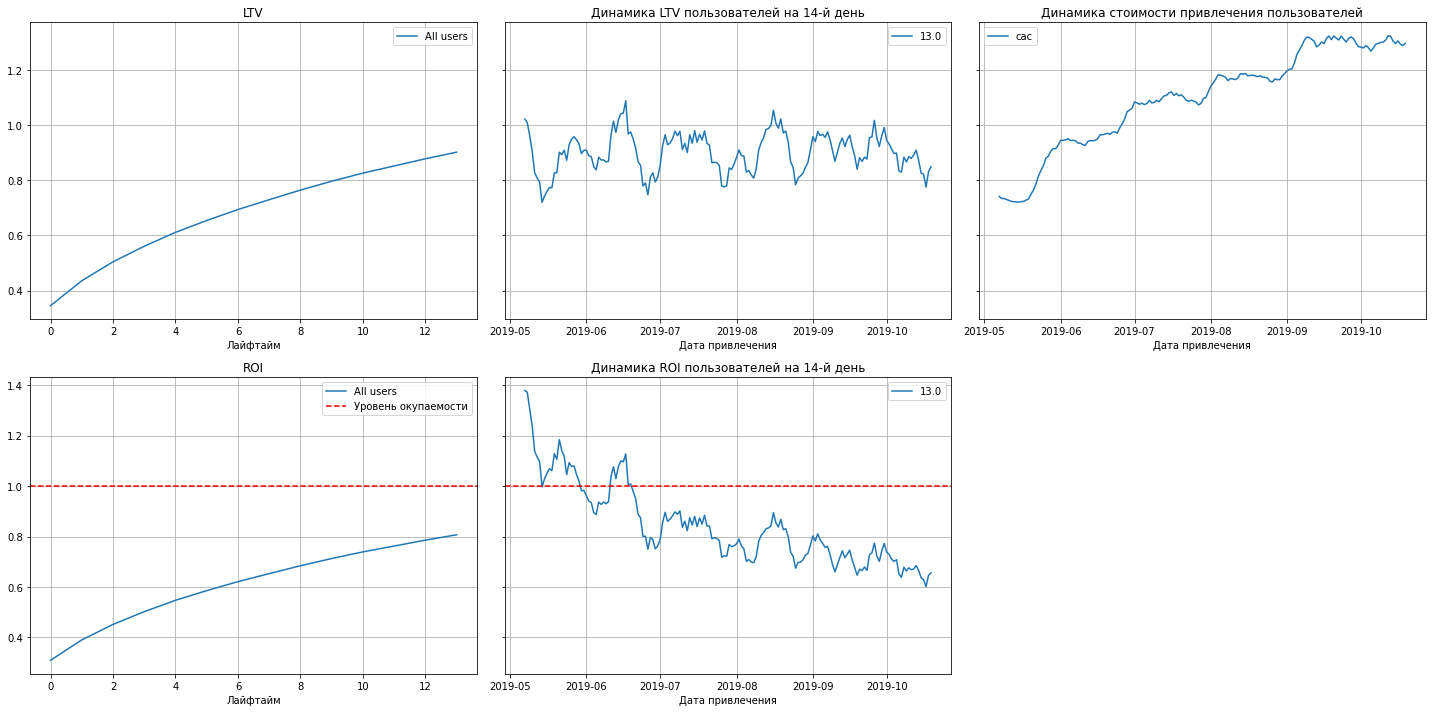

In [41]:
plot_ltv_roi(ltv, ltv_time, roi, roi_time, horizon)

**Выводы 5.1:**\
На графике ROI видно, что ROI реклама не окупается к необходимому сроку. График динамики ROI показывает, что в мае и недолгий период в июне реклама еще окупалась, однако уже наблюдается стремительное падение. Начиная с конца июня, ROI продолжает снижаться, реклама практически не окупается.\
\
Согласно графику динамики стоимости привлечения пользователей, начиная с середины мая, стоимость резко выросла и продолжает расти.
    

#### Анализ конверсии, удержания

<a id='eleventh'></a>

In [42]:
conv_raw, conv, conv_time = get_conversion(
    profiles_filtered,
    orders,
    observation_date,
    horizon,
    dimensions=[],
    ignore_horizon=False)

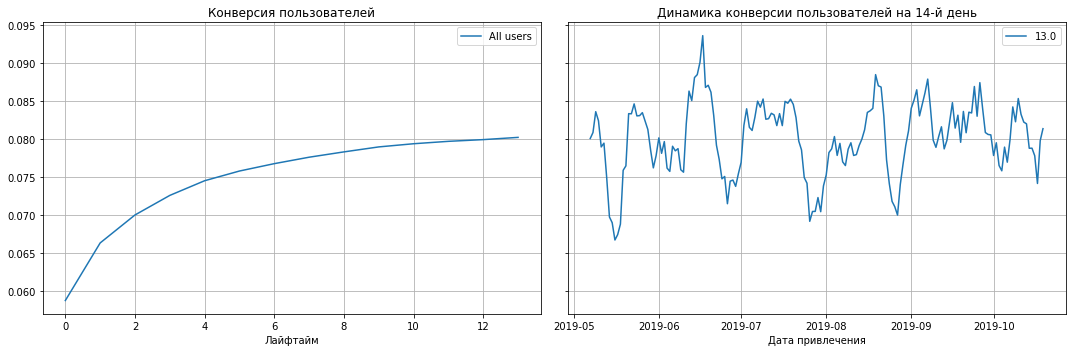

In [43]:
plot_conversion(conv, conv_time, horizon)

In [44]:
ret_raw,ret, ret_time = get_retention(
    profiles_filtered,
    visits,
    observation_date,
    horizon,
    dimensions=[],
    ignore_horizon=False,
)

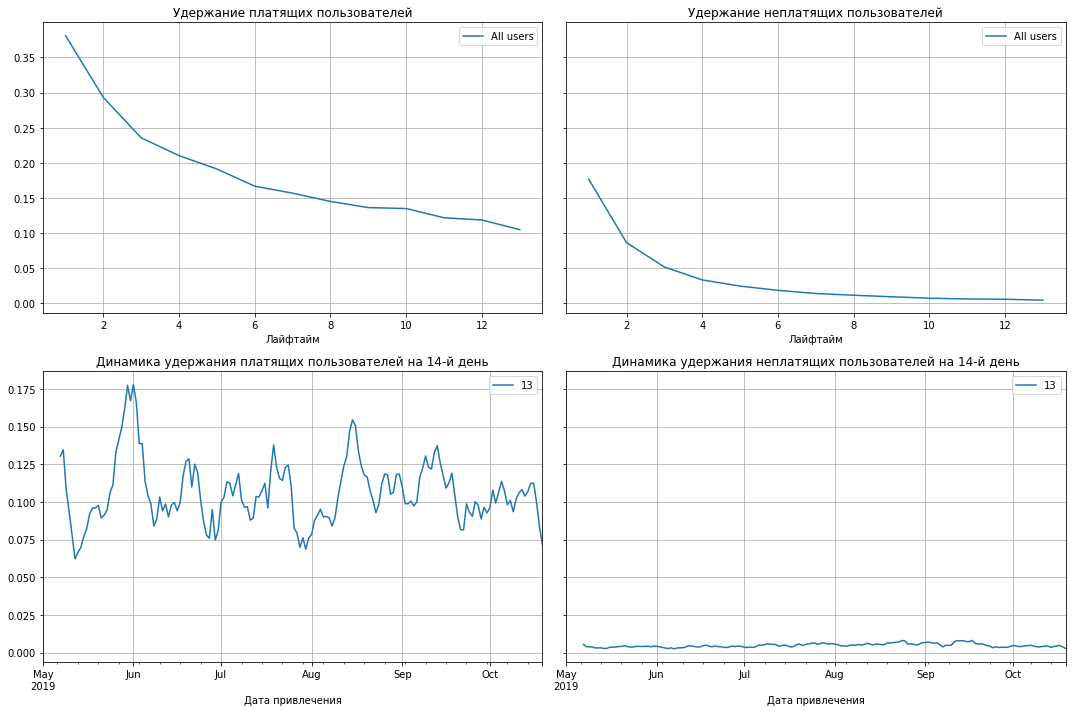

In [45]:
plot_retention(ret, ret_time, horizon)

**Выводы 5.2:**\
Более 60% пользователей конвертируются. По данным о динамике, конверсия выглядит более стабильной с сентября.\
\
Что касается удержания пользователей, согласно графику удержание неплатящих пользователей ожидаемо ниже. Однако, в целом, удержание довольно невысокое, как у платящих, так и у неплатящих пользователей.\
Динамика удержания платящих пользователей с июня достаточно стабильна и показывает неплохие показатели, динамика неплатящих - тоже стабильна, но очень невелика.

#### LTV, ROI, CAC в разбивке по видам

<a id='twelfth'></a>

In [46]:
#устройства

In [47]:
conv_raw, conv, conv_time = get_conversion(
    profiles_filtered,
    orders,
    observation_date,
    horizon,
    dimensions=['device'],
    ignore_horizon=False)

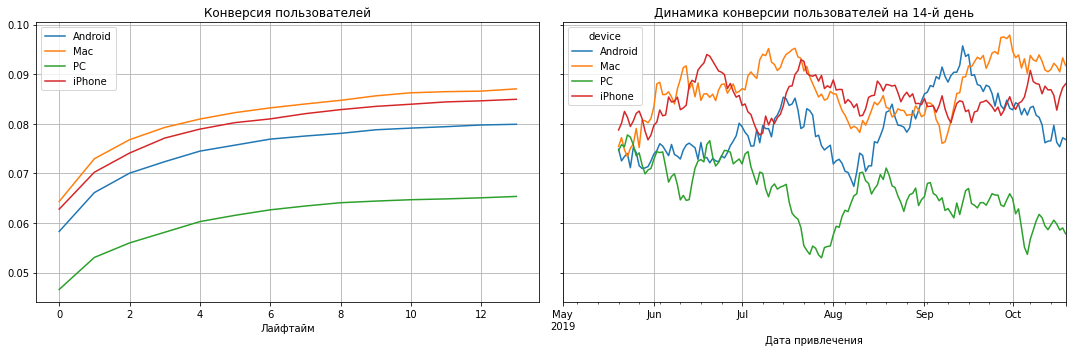

In [48]:
plot_conversion(conv, conv_time, horizon, window=20)

In [49]:
ret_raw,ret, ret_time = get_retention(
    profiles_filtered,
    visits,
    observation_date,
    horizon,
    dimensions=['device'],
    ignore_horizon=False,
)

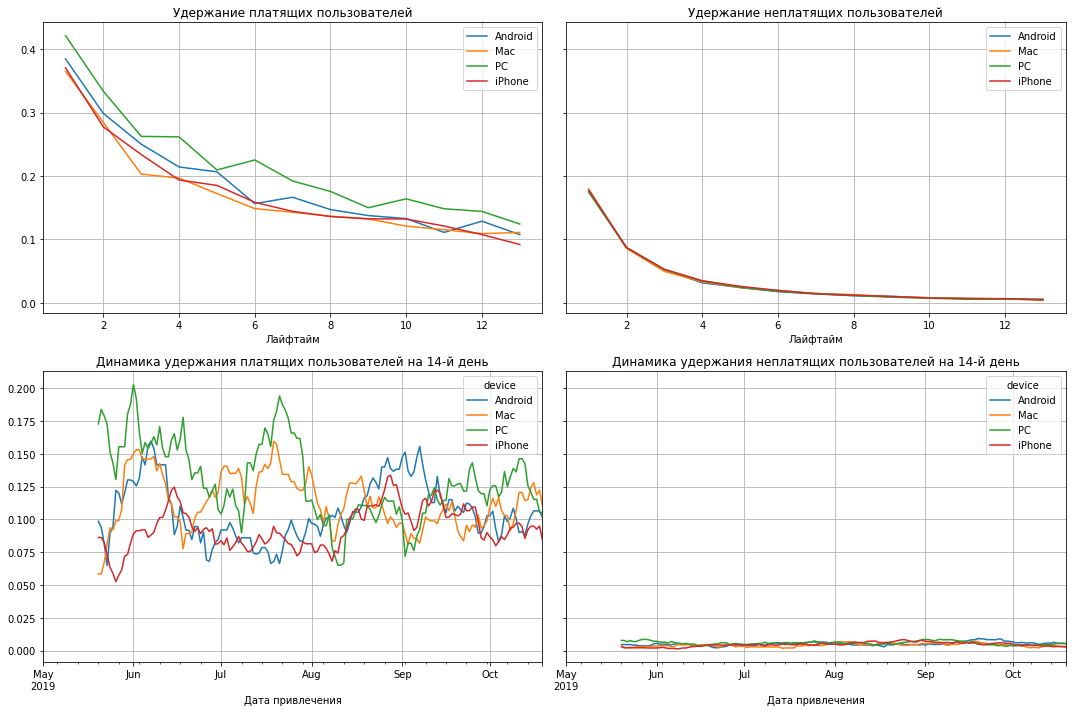

In [50]:
plot_retention(ret, ret_time, horizon, window=20)

In [51]:
ltv_raw_device,ltv_device,ltv_time_device,roi_device,roi_time_device = get_ltv(
    profiles_filtered,
    orders,
    observation_date,
    horizon,
    dimensions=['device'],
    ignore_horizon=False,
)

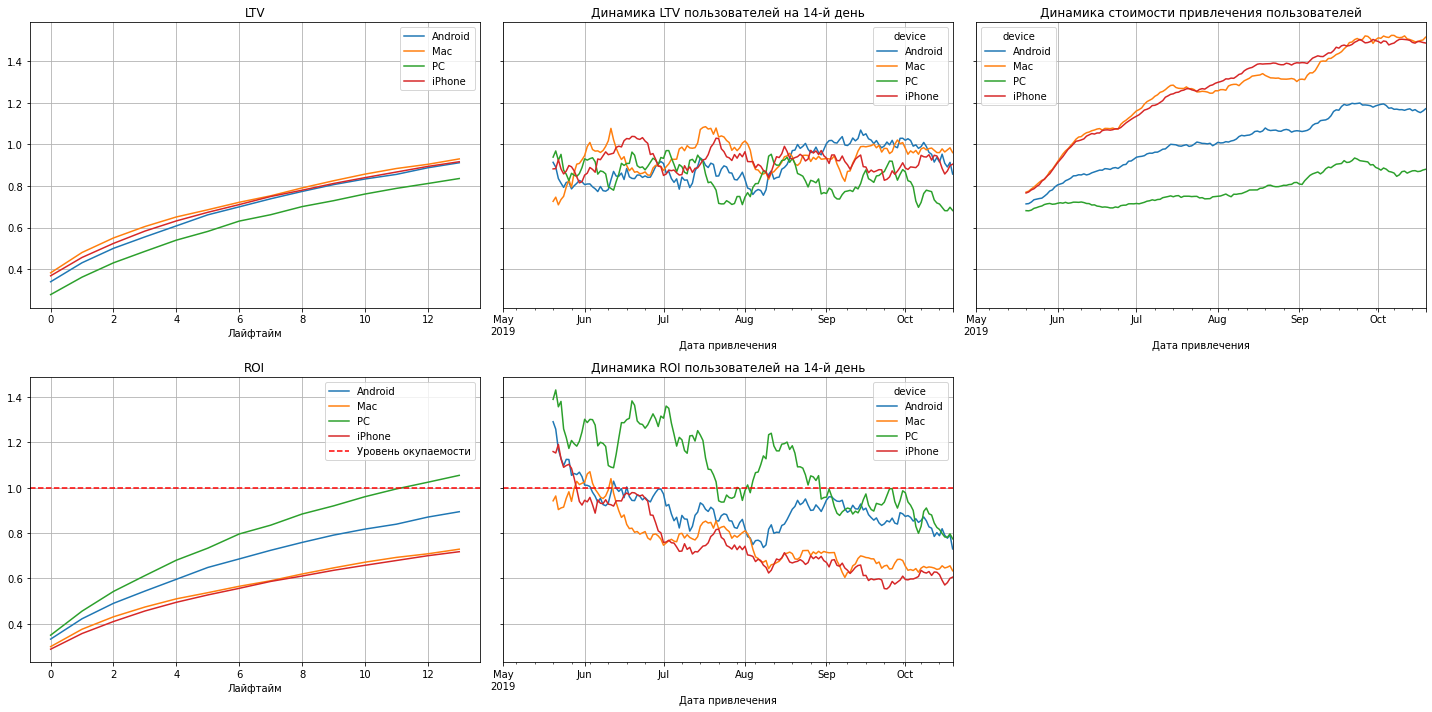

In [52]:
plot_ltv_roi(ltv_device, ltv_time_device, roi_device, roi_time_device, horizon, window=20)

**Выводы 5.3(устройства):**\
Конверсия, в целом, схожа у всех устройств. Но немного уступает PC. Конверсия Apple-устройств немного выше остальных. В динамике оставание PC более заметно, на момент конца анализируемого периода падают конверсия PC и Android.\
Показатели удержания платящих пользователей отличаются совсем немного, с августа в динамике становятся более схожими. Удержание неплатящих практически не отличается по виду устройств.\
\
LTV пользователя примерно одинаково и стабильно в динамике для всех устройств. Незначительно (5-7%) отстает прибыль от пользователей PC. Особенно заметен спад в октябре.\
\
Касаемо CAC, начиная с июня, стоимость привлечения пользователей устройств Apple резко выросла, заметен также рост цены привлечения пользователей Android, наиболее плавный и менее заметный рост у PC.\
\
Как раз вложенные в PC средства к концу срока окупаются. Пользователи Android, Mac и Iphone не достигают уровня окупаемости. В динамике заметно, что по всем устройствам ROI снижается (может быть связано в том числе с ростом расходов на маркетинг).\
Несмотря на падение, пользователи PC еще продолжают окупатьсяс переменным успехом. По пользователям Android и Apple-устройств убыточное положение наблюдается с июня.
    

In [53]:
#страны

In [54]:
conv_raw, conv, conv_time = get_conversion(
    profiles_filtered,
    orders,
    observation_date,
    horizon,
    dimensions=['region'],
    ignore_horizon=False)

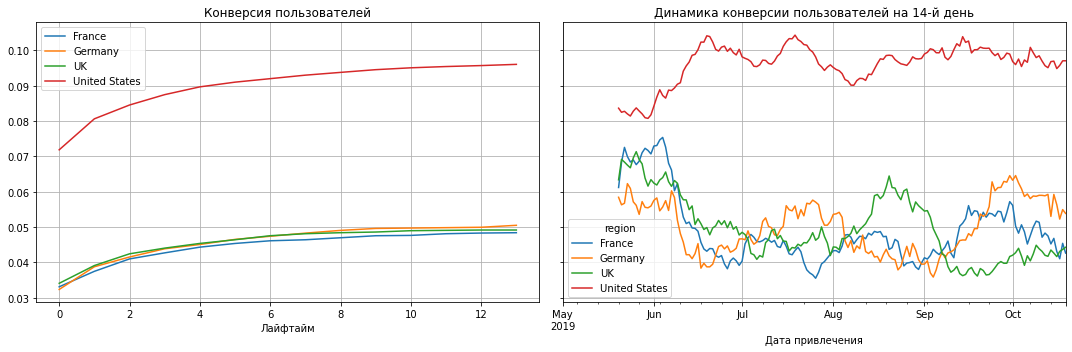

In [55]:
plot_conversion(conv, conv_time, horizon, window=20)

In [56]:
ret_raw,ret, ret_time = get_retention(
    profiles_filtered,
    visits,
    observation_date,
    horizon,
    dimensions=['region'],
    ignore_horizon=False,
)

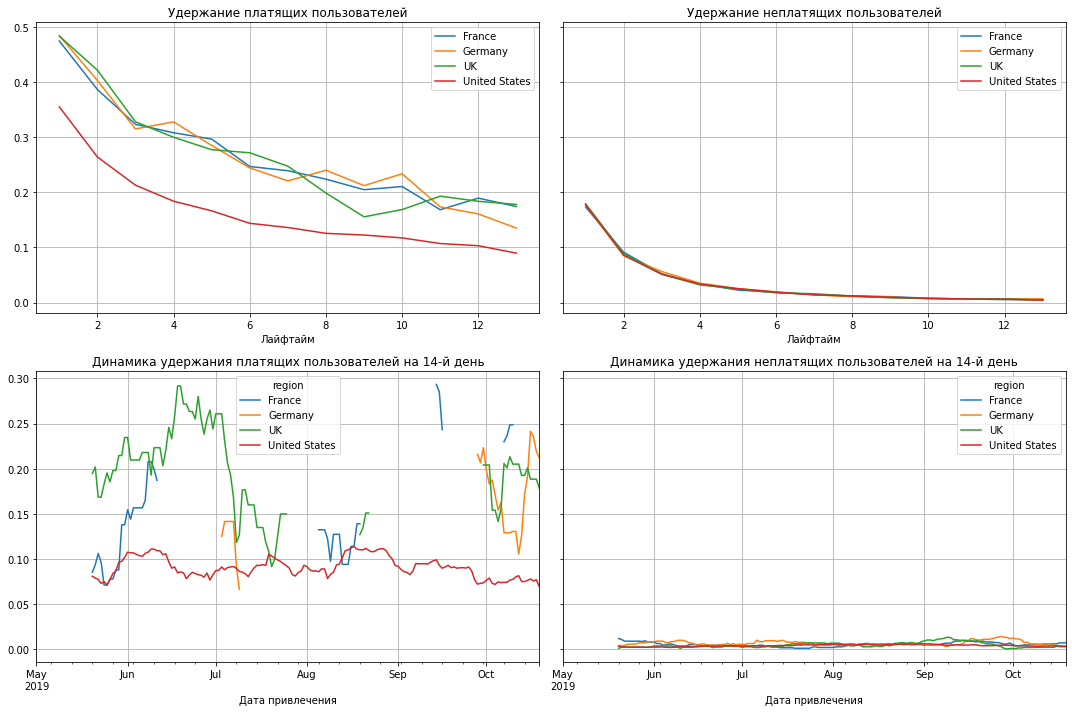

In [57]:
plot_retention(ret, ret_time, horizon, window=20)

In [58]:
ltv_raw_region,ltv_region,ltv_time_region,roi_region,roi_time_region = get_ltv(
    profiles_filtered,
    orders,
    observation_date,
    horizon,
    dimensions=['region'],
    ignore_horizon=False,
)

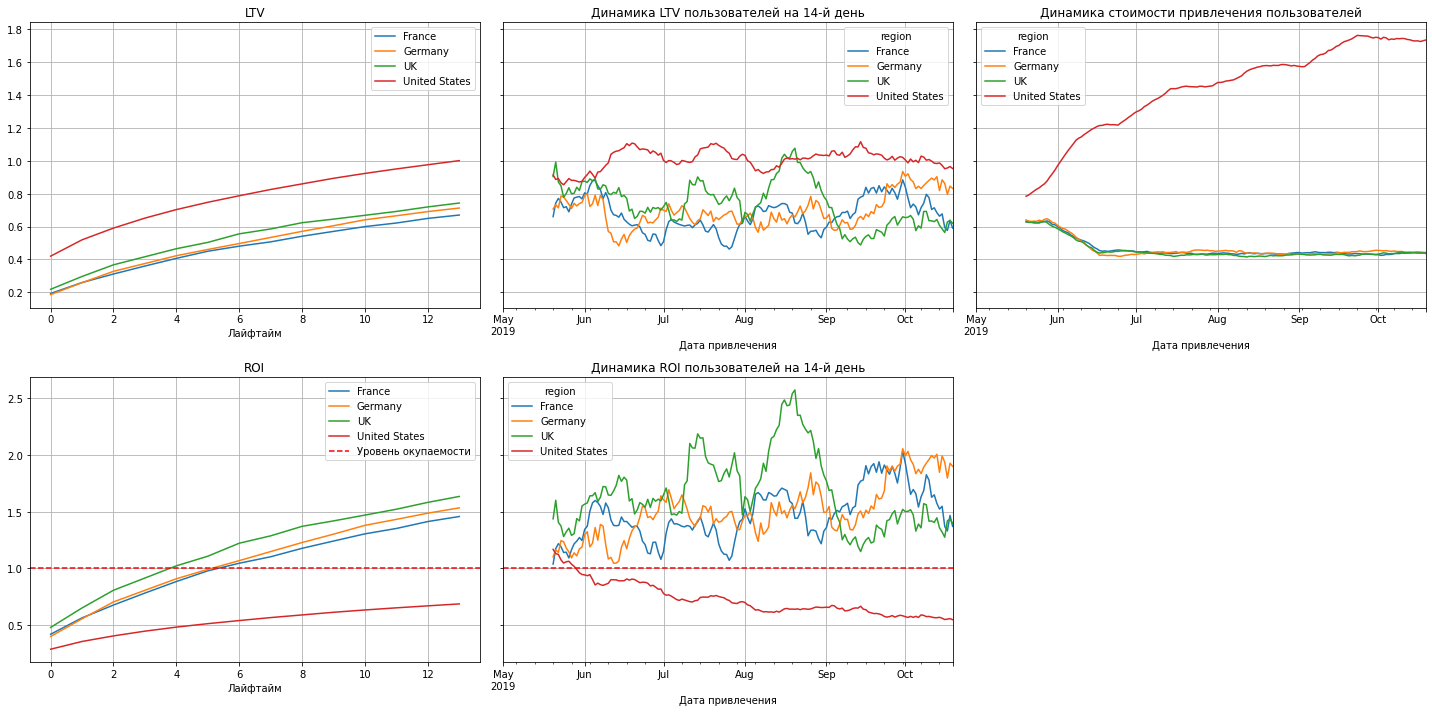

In [59]:
plot_ltv_roi(ltv_region, ltv_time_region, roi_region, roi_time_region, horizon, window=20)

**Выводы 5.3(страны):**\
Конверсия стабильна около 4-7% на протяжении всего периода анализа для всех стран, кроме США. Пользователи из США стабильно конвертируются почти в 2 раза больше, особенно с середины июня.\
\
А вот показатели удержания платящих пользователей наоборот значительно ниже среди пользователей-американцев. Показатели по удержанию неплатящих также практически не отличаются.\
\
LTV пользователей примерно одинаково и стабильно в динамике всех стран. Немного лидирует прибыль от пользователей из США. Согласно графику динамики, начиная с июня, показатель LTV пользователей из США наиболее стабилен и высок.\
\
Америка также сильно лидирует по показателю CAC, который начал расти с середины мая и продолжает до конца периода анализа. В то время, как стоимость привлечения пользователей снизилась для всехпрочих стран в конце мая и остается стабильной.\
\
Соотносится с выросшими расходами тот факт, что из всех стран только реклама в США не окупается.\
Если говорить о динамике ROI, стоит отметить резкие скачки в июле и августе в Великобритании, все европейские страны показывают более-менее стабильные результаты. Выделяется только США, чьи показатели снижались с начала периода анализируемых данных и спустились ниже уровня окупаемости в июне и продолжили плавно падать.
    

In [60]:
#рекламные каналы

In [61]:
conv_raw, conv, conv_time = get_conversion(
    profiles_filtered,
    orders,
    observation_date,
    horizon,
    dimensions=['channel'],
    ignore_horizon=False)

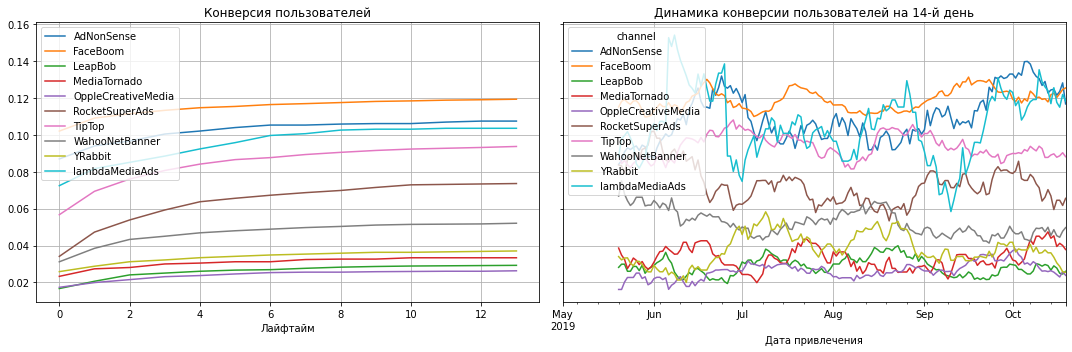

In [62]:
plot_conversion(conv, conv_time, horizon, window=20)

In [63]:
ret_raw,ret, ret_time = get_retention(
    profiles_filtered,
    visits,
    observation_date,
    horizon,
    dimensions=['channel'],
    ignore_horizon=False,
)

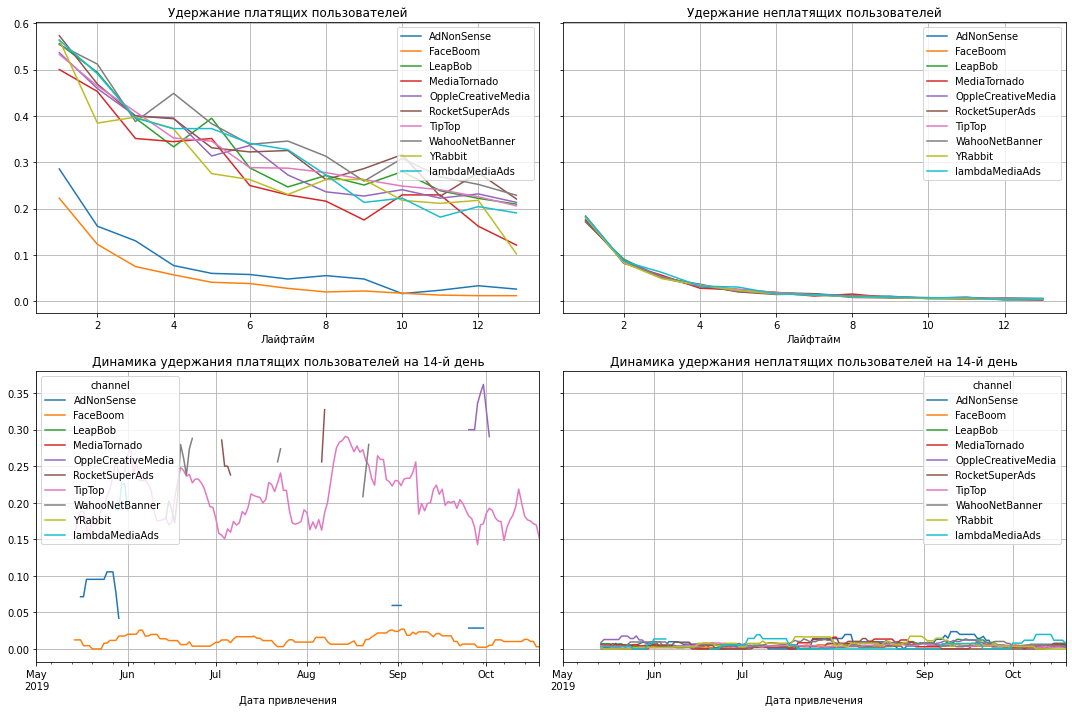

In [64]:
plot_retention(ret, ret_time, horizon, window=14)

In [65]:
ltv_raw_channel,ltv_channel,ltv_time_channel,roi_channel,roi_time_channel = get_ltv(
    profiles_filtered,
    orders,
    observation_date,
    horizon,
    dimensions=['channel'],
    ignore_horizon=False,
)

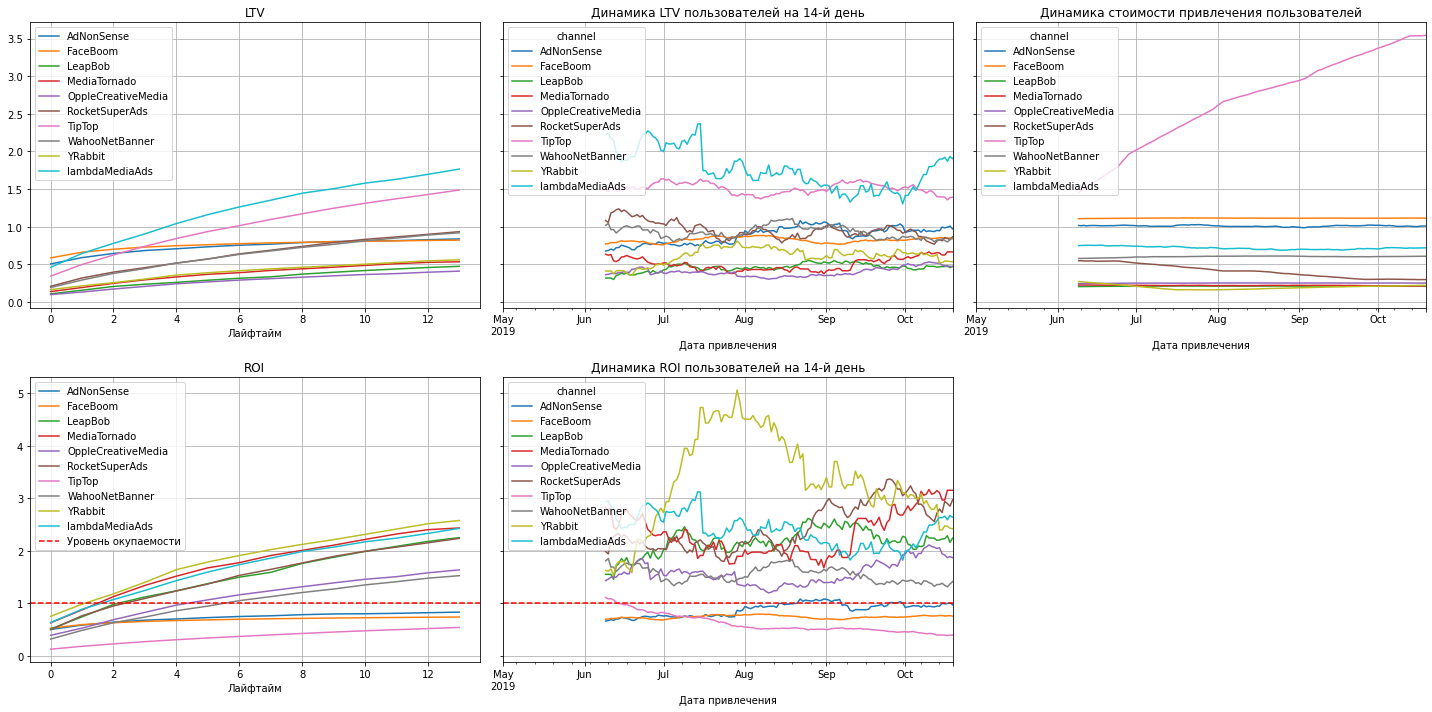

In [66]:
plot_ltv_roi(ltv_channel, ltv_time_channel, roi_channel, roi_time_channel, horizon, window=40)

**Выводы 5.3(рекламные источники):**\
Самые лучшие показатели конверсии показывают источники FaceBoom, AdNonSense, lambdaMediaAds и TipTop(по убыванию). В динамике также привлекает внимание RocketSuperAds.\
\
Что касается удержания, большинство источников показывают очень схожие результаты. Выделяются FaceBoom и AdNonSense, чьи показатели стабильно ниже остальных, особенно у FaceBoom.\
\
Наиболее высокий рост LTV пользователей наблюдается среди пользоватеелй пришедших через каналы lambdaMediaAds и TipTop. В динамике два этих источника также выделяются на фоне остальных.\
\
Рассматривая график CAC, показатели большинства источников привлечения стабильны. Исключение составляет TipTop, траты на которой изначально являлись самыми большими. Расходы на TipTop c июня стремительно выросли более, чем в 2 раза.\
\
Не достигли уровня окупаемости наиболее дорогие рекламные каналы: TipTop, FaceBoom и чуть менее дорогой AdNonSense.\
Если говорить о динамике ROI, FaceBoom и TipTop практически не окупались за весь период исследуемых данных, AdNonSense с августа приблизилась к уровню окупаемости. Окупаемость этого источника плавно растет. С начала анализа данных выделяется резкий скачок YRabbit с июля по сентябрь(возможно в том числе в силу небольших расходов на маркетинг).

#### Общий вывод 5:

В целом, реклама, направленная на привлечение пользователей не окупается к *горизонту данных - 14-ти дням*. Общий график динамики ROI показывает - в мае-июне реклама окупалась, хотя ROI снижалась. Спад продолжается, и, начиная с конца июня, реклама практически не окупается.\
\
Стоимость привлечения пользователей резко выросла с конца мая и продолжает стремительно расти. Резко возросшие траты на рекламу вероятно являются причиной общей тенденции снижения окупаемости рекламы.\
\
Конверсия пользователей относительно стабильна с июня. К концу двух недель более половины пользователей конвертируются.\
Касаемо показателей удержания, в целом, оно довольно невысокое, как у платящих (около 10% возвращаются на 14-й день), так и у неплатящих пользователей (около 1%).\
В динамике удержание платящих пользователей, в целом, стабильно и показывает неплохие показатели, динамика неплатящих - тоже стабильна, но значительно ниже удержания платящих.\
\
Проанализировав разные устройства, заметно, что, начиная с июня, стоимость привлечения пользователей всех устройств выросла. Однако, наиболее заметен рост цены привлечения у пользователей устройств Apple: Iphone и Mac, наиболее плавный едва заметный рост у PC (здесь стоит отметить, что пользователи Iphone и Mac конвертируются лучше всего, а PC хуже).\
Средства, вложенные в привлечение пользователей Mac, Iphone и Android, не окупаются.PC окупается. Вероятно, в связи с резким ростом общих расходов на привлечение, в динамике заметно, что окупаемость снижается для всех устройств.\
Заметно, что пользователи PC продолжают окупаться. Привлечение пользователей Android и Apple-устройств, почти 75% аудитории сервиса, приносит убытки с июля.\
\
Пользователи из США - 2/3 от всех профилей - показывают чуть более высокие и стабильные показатели прибыли за срок жизни. Также привлеченные американцы показывают наиболее высокие показатели конверсии, тем не менее результаты удержания негативные. На фоне остальных США выделяется и со стороны конверсии, и со стороны удержания.\
Америка значительно сильнее лидирует по показателю CAC, с начала анализируемого периода стоимость сильно выросла и продолжает расти, в то время, как в других странах стоимость снизилась. Отсюда, США - единственная страна из анализируемых, где траты на маркетинг совсем не окупаются.\
Прочие европейские страны показывают более-менее стабильные результаты в целом, и в динамике. Что касается США, показатель ROI резко упал до уровня окупаемости к маю и продолжил плавно снижаться. Такое резкое падение может быть связано с возросшими ценами на привлечение.\
\
Сочетание проблем с окупаемостью у устройств Apple и у профилей из США может быть связано, поскольку Apple является наиболее популярным брендом в США, по данным из открытых интернет-источников, около 40% владельцев смартфонов в США предпочитают айфоны.Вероятно стоит обратить внимание на маркетинговую стратегию и источники привлечения пользователей в США, а также в отношении пользователей Apple-устройств.\
\
С точки зрения конверсии, лучшие результаты показывают FaceBoom, AdNonSense, lambdaMediaAds и TipTop(по убыванию). Однако, если посмотреть на удержание, то в негатвином плане выделяются FaceBoom и AdNonSense - лидеры по конверсии.\
Наиболее высокий рост LTV пользователей наблюдается среди пользователей пришедших через каналы lambdaMediaAds и TipTop. В динамике два этих источника также выделяются на фоне остальных.В динамике эти два источника также стабильны и показывают наиболее высокий результат. Стоит отметить, что хотя показатели выше, разница не огромна.\
С точки зрения привлечения пользователей CAC, показатели большинства источников привлечения стабильны в своей стоимости без резких скачков и падений. Исключение - TipTop, с июня расходы на изначально дорогой канал привлечения стремительно выросли еще больше - примерно в 2 раза.\
Не окупаются наиболее дорогие рекламные каналы: TipTop, FaceBoom и чуть менее дорогой AdNonSense.
В динамике FaceBoom и TipTop практически не окупались за весь период исследуемых данных. AdNonSense находится в зоне уровня окупаемости и очень плавно растет.\
Вероятно, в связи с невысокими расходами на маркетинг, отлично окупается источник YRabbit.

### Выводы

В ходе исследования были рассмотрены **данные о пользователях развлекательного приложения Procrastinate Pro+ с 1 мая по 27 октября 2019 года**: лог сервера с информацией о посещениях сайта, информация о заказах и информациях о расходах на рекламу.\
\
Были проанализированы значения параметров: 
1. пользовательские профили, 
2. регионы, 
3. устройства, 
4. источники привлечения.\
\
Определены общая информация по содержанию парметров, период полученных данных, доля платящих пользователей по каждому из параметров.\
\
Оcобое внимание уделено маркетинговым исследованиям. Выявлена общая сумма маркетинговых расходов за наблюдаемый период: *105 497 денежных единиц*. Изучена динамика расходов по каждому рекламному источнику по неделям и более широко по месяцам.\
Определены средние цены привлечения пользователя(CAC) по каждому рекламному источнику. От 0 за органических пользователей до 3 денежных единиц за привлечение через канал TipTop.\
\
Основная **цель исследования - разобраться в причинах неоккупаемости рекламы и помочь компании выйти в плюс**. Для этого были проанализированы различные метрики.\
\
Рассмотрены графики (пожизненная ценность клиента)LTV и (коэфициент оккупаемости инвестиций)ROI, а также графики динамики LTV, CAC и ROI, графики конверсии и удержания пользователей и динамики их изменения. Для более полного погружения в причины были рассмотрены не только метрики в отношении всех пользователей в целом, но также с разбивкой: по устройствам, по странам, по рекламным каналам.\
\
По результатам исследования были выявлены возможные причины неэффективности и составлены рекомендации (ниже).

#### Причины неэффективности

<a id='fourteenth'></a>

Весомые проблемы с окупаемостью наблюдаются у устройств Apple и у профилей из США. Такая комбинация может быть взаимосвязана, поскольку Apple является наиболее популярным брендом в США, по данным из открытых интернет-источников. На графике положение осей США и устройств Apple очень схожи.\
В штатах высокий уровень конверсии, но удержание пользователей значительно ниже, чем в других странах.\
Обратная ситуация у PC-платформы: конверсия - низкая, удержание - самое высокое.\
Многочисленная плтаформа Android также находится на грани окупаемости и требует более внимательного отношения.\
\
Также проблемы с оккупаемостью могут быть связаны(и вероятно связаны) с резким ростом стоимости рекламных источников работающих с Америкой. Так, наиболее дорогие каналы привлечения TipTop и FaceBoom, хотя привлекают большое количество пользователей, совсем не окупаются, при этом забирая суммарно половину рекламных расходов.

#### Рекомендации

<a id='fifteenth'></a>

Для того, чтобы рекламные расходы начали приносить прибыль, а не убытки, вероятно стоит обратить внимание на маркетинговую стратегию наиболее прибыльной, с точки зрения, количества пользователей - США, и пользователей Apple-устройств.\
\
Основная проблема вероятно связана с слишком дорогостоящими источниками и малым удержанием пользователей.\
Вероятно стоит обратить внимание на работу с маркетинговыми источниками\инструментами, повышающими удержание платящих клиентов. При повышении удержания пользователи из США могут принести прибыль.\
\
О стоимости привлечения клиентов: стоит обратить внимание на неоккупающиеся источники TipTop, FaceBoom и чуть менее дорогой AdNonSense. FaceBoom и AdNonSense действительно привлекаеют большое количество клиентов и показывают хорошие результаты конверсии, но совершенно не выгодны с точки зрения удержания. Возможно имеет смысл пересмотреть условия сотрудничества с этими источниками, или обратить внимание на источники с хорошими показателями удержания, например, lambdaMediaAds и RocketSuperAds.\
В тему источников также стоит обратиь внимание на TipTop - рекламный источник показывает неплохую конверсию и удержание, однако, стоимость привлечения очень сильно выросла за период анализа. Этот источник также за счет роста стоимости невыгоден, 1\3 их всех рекламных расходов приходится на этот рекламный канал. Возможно стоит также пересмотреть варианты сотрудничества с этим каналом.